# Importing All Packages

In [1]:
from matplotlib import pyplot
import scipy as sp
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_recall_curve
from random import sample, seed
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn import tree 
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import lightgbm as lgbm
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import time
import warnings
warnings.filterwarnings('ignore')

# Designing Evaluation Functions

### Confusion Matrix function:

In [4]:
#自定义混淆矩阵正确率函数
def confusion_matrix_Accuracy(x,y,model):
    predict_train=model.predict(x)
    print(metrics.confusion_matrix(y, predict_train)) # 输出混淆矩阵信息
    print(metrics.classification_report(y,predict_train)) #输出分类报告信息,行输出实际观察，列输出预测结果

# Q1. Mayor hotline text classification

## 1.Read

说明：这里已经使用R程序对Y.txt与X.mat两个数据集进行了预处理，将其合并在了一起

其中，读取到的Data_Mayor.csv为合并后的原始数据
Train_Mayor和Test_Mayor为将选择出来的5个单位的文本按照大约8：2的比例随机的分为训练集和测试集

### R-studio codes：

setwd("mayor/")

rm(list=ls())

library(R.matlab)

XX = readMat('X.mat',encoding = "UTF-8")

#XX = read.table("X.txt",sep=",");

x = XX$x

x = as.matrix(x)

#将x数据变为数据框

data = data.frame(x)

dim(x)

#读取y数据

y = read.table('Y.txt',sep = '\t',header = TRUE)

#将y数据和x数据整合到一起

data = data.frame(y,data)

#设置随机数种子

set.seed(20210528)

sub = sample(1:nrow(x),round(nrow(x)*0.8))

train = data[sub,]#取80%的数据做训练集

test = data[-sub,]

dim(train)

dim(test)

write.csv(data,file = "Data_Mayor.csv",row.names = F)

write.csv(train,file = "Train_Mayor.csv",row.names = F)

write.csv(test,file = "Test_Mayor.csv",row.names = F)

In [5]:
Data_mayor = pd.read_csv(r"Data_Mayor.csv", header=0, encoding="utf8")
Train_mayor = pd.read_csv(r"Train_Mayor.csv", header=0, encoding="utf8")
Test_mayor = pd.read_csv(r"Test_Mayor.csv", header=0, encoding="utf8")

In [6]:
Train_mayor

,X18,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X9349,X9350,X9351,X9352,X9353,X9354,X9355,X9356,X9357,X9358
0,6,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,6,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,18,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19996,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,6,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Train_mayor = Train_mayor.rename(columns={'X18':'Y','X18.1':'X18'})
Test_mayor = Test_mayor.rename(columns={'X18':'Y','X18.1':'X18'})

In [8]:
col = Train_mayor.columns

In [9]:
train_x = Train_mayor[col[1:]]
train_y = Train_mayor[col[0]]
test_x = Test_mayor[col[1:]]
test_y = Test_mayor[col[0]]

In [10]:
X1_train = train_x
X1_test = test_x
Y_train = train_y
Y_test = test_y

# Modelling

## Naive Bayes

In [13]:
start1 =time.clock()
MNB_clf = MultinomialNB(alpha=0.2)
MNB_clf.fit(X1_train, Y_train)
end1=time.clock()
print('Running time: %s Seconds'%(end1-start1))

Running time: 3.512552499999856 Seconds


### K-fold Cross Validation
将原始数据分成K组（一般是均分），将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型，用这K个模型最终的验证集的分类准确率的平均数作为此K-CV下分类器的性能指标。

In [14]:
#采用5层交叉检验，评价指标选择f1_micro
test_score1 = cross_val_score(MNB_clf, X1_test, Y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score1.mean())

5层交叉检验平均得分 0.9086000000000001


In [15]:
#观察混淆矩阵及其正确率
print('朴素贝叶斯算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X1_test,Y_test,MNB_clf)

朴素贝叶斯算法 测试集 混淆矩阵及其正确率：
[[953   1   4   4  46]
 [  8 915  16   2  38]
 [  2   6 920   7  33]
 [ 11   0   9 950  40]
 [ 37  31  23  25 919]]
              precision    recall  f1-score   support

           1       0.94      0.95      0.94      1008
           2       0.96      0.93      0.95       979
           3       0.95      0.95      0.95       968
           6       0.96      0.94      0.95      1010
          18       0.85      0.89      0.87      1035

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



## KNN

In [16]:
start2 =time.clock()
KN_clf = KNeighborsClassifier(n_neighbors=49)   #KNN分类器
KN_clf.fit(X1_train, Y_train)
end2=time.clock()
print('Running time: %s Seconds'%(end2-start2))

Running time: 0.3389681999997265 Seconds


In [17]:
#采用5层交叉检验，评价指标选择f1_micro
test_score2 = cross_val_score(KN_clf, X1_test, Y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score2.mean())

5层交叉检验平均得分 0.8015999999999999


In [18]:
#观察混淆矩阵及其正确率
print('KNN算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X1_test,Y_test,KN_clf)

KNN算法 测试集 混淆矩阵及其正确率：
[[980   2   7   1  18]
 [ 90 804  12   4  69]
 [ 30   1 914   1  22]
 [ 88   7  27 837  51]
 [200  64 101  52 618]]
              precision    recall  f1-score   support

           1       0.71      0.97      0.82      1008
           2       0.92      0.82      0.87       979
           3       0.86      0.94      0.90       968
           6       0.94      0.83      0.88      1010
          18       0.79      0.60      0.68      1035

    accuracy                           0.83      5000
   macro avg       0.84      0.83      0.83      5000
weighted avg       0.84      0.83      0.83      5000



## Logistic

In [19]:
start3 =time.clock()
LR_clf = LogisticRegression(solver='liblinear', penalty='l1')   #Logistic分类器
LR_clf.fit(X1_train, Y_train)
end3=time.clock()
print('Running time: %s Seconds'%(end3-start3))

Running time: 9.660519099999874 Seconds


In [20]:
#采用5层交叉检验，评价指标选择f1_micro
test_score3 = cross_val_score(LR_clf, X1_test, Y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score3.mean())

5层交叉检验平均得分 0.9404


In [21]:
#观察混淆矩阵及其正确率
print('逻辑斯蒂算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X1_test,Y_test,LR_clf)

逻辑斯蒂算法 测试集 混淆矩阵及其正确率：
[[982   4   1   1  20]
 [  6 955   4   0  14]
 [  1   1 951   1  14]
 [  4   4   4 988  10]
 [ 40  31  31  26 907]]
              precision    recall  f1-score   support

           1       0.95      0.97      0.96      1008
           2       0.96      0.98      0.97       979
           3       0.96      0.98      0.97       968
           6       0.97      0.98      0.98      1010
          18       0.94      0.88      0.91      1035

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



## Random forest

In [22]:
start4 =time.clock()
RF_clf = RandomForestClassifier(n_estimators=31, random_state=111)  #随机森林分类器
RF_clf.fit(X1_train, Y_train)
end4=time.clock()
print('Running time: %s Seconds'%(end4-start4))

Running time: 28.25981039999988 Seconds


In [23]:
#采用5层交叉检验，评价指标选择f1_micro
test_score4 = cross_val_score(RF_clf, X1_test, Y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score4.mean())

5层交叉检验平均得分 0.9260000000000002


In [24]:
#观察混淆矩阵及其正确率
print('随机森林算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X1_test,Y_test,RF_clf)

随机森林算法 测试集 混淆矩阵及其正确率：
[[979   2   2   1  24]
 [  5 954   5   0  15]
 [  4   1 950   1  12]
 [  7   2   3 988  10]
 [ 66  53  48  50 818]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      1008
           2       0.94      0.97      0.96       979
           3       0.94      0.98      0.96       968
           6       0.95      0.98      0.96      1010
          18       0.93      0.79      0.85      1035

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



## ET

In [25]:
start5 =time.clock()
ET_clf = ExtraTreesClassifier(n_estimators=9, random_state=111)  #极度随机树分类器
ET_clf.fit(X1_train, Y_train)
end5=time.clock()
print('Running time: %s Seconds'%(end5-start5))

Running time: 10.857990999999856 Seconds


In [26]:
#采用5层交叉检验，评价指标选择f1_micro
test_score5 = cross_val_score(ET_clf, X1_test, Y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score5.mean())

5层交叉检验平均得分 0.9066000000000001


In [27]:
#观察混淆矩阵及其正确率
print('AdaBoost算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X1_test,Y_test,ET_clf)

AdaBoost算法 测试集 混淆矩阵及其正确率：
[[973   3   1   4  27]
 [  7 956   4   0  12]
 [  2   1 950   0  15]
 [  9   2   3 985  11]
 [ 64  44  48  46 833]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      1008
           2       0.95      0.98      0.96       979
           3       0.94      0.98      0.96       968
           6       0.95      0.98      0.96      1010
          18       0.93      0.80      0.86      1035

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [72]:
AP = {'Native Bayes': 0.93, 'K-Nearest Neighbor': 0.83, 'Logistic': 0.96
          , 'Random Forest':  0.94, 'Extra Trees':  0.94}

In [73]:
df3 = pd.DataFrame([AP]).T
df3.columns=['Average_Precision']
df3

,Average_Precision
Native Bayes,0.93
K-Nearest Neighbor,0.83
Logistic,0.96
Random Forest,0.94
Extra Trees,0.94


In [74]:
CVS = {'Native Bayes': 0.9086, 'K-Nearest Neighbor': 0.8016, 'Logistic': 0.9404
          , 'Random Forest':  0.9260, 'Extra Trees':  0.9066}

In [75]:
df4 = pd.DataFrame([CVS]).T
df4.columns=['Cross_Val_Score']
df4

,Cross_Val_Score
Native Bayes,0.9086
K-Nearest Neighbor,0.8016
Logistic,0.9404
Random Forest,0.9260
Extra Trees,0.9066


In [76]:
ALL= pd.concat([df3,df4],axis=1,join='inner')

In [77]:
ALL

,Average_Precision,Cross_Val_Score
Native Bayes,0.93,0.9086
K-Nearest Neighbor,0.83,0.8016
Logistic,0.96,0.9404
Random Forest,0.94,0.9260
Extra Trees,0.94,0.9066


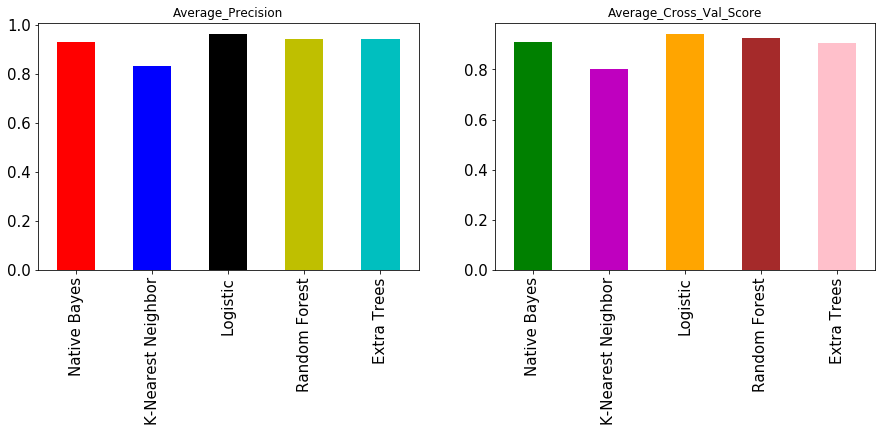

In [82]:
plt.subplot(221)
ALL.Average_Precision.plot(kind='bar',color=['r','b','k','y','c'],figsize=(15,10))
plt.title('Average_Precision')
plt.tick_params(labelsize=15)
plt.subplot(222)
ALL.Cross_Val_Score.plot(kind='bar',color=['g','m','orange','brown','pink'],figsize=(15,10))
plt.title('Average_Cross_Val_Score')
plt.tick_params(labelsize=15)
plt.show()

#### ---------------------------------------------------------------------------Cutting Line-------------------------------------------------------------------------------

# Q2. ADNI Disease problem

读取三个数据集：
“diagcovariates.txt”中包含着798个病人的ID，性别，手性，婚姻状态，受教育年限，年龄，患病状态（取值1，2，3）. 
“left.txt”和“right.txt”分别是病人响应的左右海马体图片信息。

In [28]:
diagcovariates = pd.read_table(r"diagcovariates.txt", header=None, sep=' ')
left = pd.read_table(r"left.txt", header=None, sep=' ')
right = pd.read_table(r"right.txt", header=None, sep=' ')

In [29]:
diagcovariates.columns = ['RID','Gender','Handedness','Widowed','Divorced','Never married','Education','Retirement','Age','status']

In [30]:
diagcovariates

,RID,Gender,Handedness,Widowed,Divorced,Never married,Education,Retirement,Age,status
0,295,1,1,0,0,0,18,1,85,1
1,413,2,1,0,0,0,16,0,77,1
2,559,1,1,1,0,0,16,1,79,1
3,619,1,1,0,0,0,12,1,78,3
4,685,2,1,0,0,0,16,1,90,1
...,...,...,...,...,...,...,...,...,...,...
793,1202,1,1,0,0,0,18,0,78,1
794,1203,1,1,0,0,0,15,1,84,1
795,1295,1,1,0,0,0,16,1,77,2
796,1311,1,1,0,0,0,12,1,69,2


In [31]:
left

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,3.73285,3.76993,3.80816,3.84553,3.88408,3.92179,3.95868,3.94508,3.88408,3.82248,...,0.411954,0.447782,0.487095,0.535711,0.605124,0.681468,0.751954,0.794345,0.826464,0.858276
1,4.11159,4.15101,4.18747,4.19553,4.15232,4.09996,4.04660,3.98691,3.92033,3.85465,...,0.645518,0.705777,0.771735,0.839883,0.893981,0.940470,0.986969,1.033320,1.081420,1.130180
2,3.51622,3.55474,3.59470,3.63407,3.67277,3.69441,3.65552,3.61697,3.57885,3.54112,...,0.883617,0.911724,0.940210,0.969138,0.999126,0.990508,0.973164,0.955865,0.938724,0.921745
3,2.29593,2.33203,2.36995,2.41134,2.45382,2.49834,2.54639,2.59522,2.64461,2.65628,...,0.540921,0.584262,0.628912,0.666792,0.698630,0.730100,0.762093,0.793558,0.826385,0.853387
4,4.31478,4.33986,4.36448,4.38936,4.41472,4.41443,4.38293,4.34471,4.30308,4.22535,...,0.420780,0.466040,0.513527,0.559993,0.604483,0.649873,0.695058,0.740856,0.788090,0.834810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,3.22970,3.17228,3.11360,3.05896,3.01277,2.97263,2.92860,2.86336,2.78300,2.70215,...,1.125630,1.147160,1.151020,1.133300,1.115760,1.098460,1.080400,1.063590,1.046030,1.029730
794,4.08933,4.11867,4.14926,4.17915,4.21029,4.23953,4.23639,4.17606,4.09770,3.99615,...,1.024770,1.046210,1.066820,1.088560,1.109440,1.131440,1.153550,1.175770,1.197100,1.217220
795,3.50349,3.57308,3.64366,3.70344,3.74669,3.78534,3.82348,3.85303,3.84437,3.79883,...,0.548443,0.586127,0.622293,0.657778,0.694935,0.733643,0.769018,0.797882,0.828787,0.859730
796,3.74274,3.75072,3.71590,3.67738,3.63918,3.60130,3.56371,3.52275,3.47097,3.41613,...,0.813370,0.829786,0.846427,0.864271,0.882334,0.899591,0.918055,0.935692,0.953473,0.972409


In [32]:
right

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,3.82732,3.87203,3.90810,3.89574,3.85338,3.81148,3.77002,3.72874,3.68634,3.62240,...,0.865832,0.909699,0.954812,0.995493,1.022530,1.046700,1.071470,1.097070,1.123260,1.139840
1,4.14997,4.16362,4.11397,4.06151,4.00110,3.92144,3.83337,3.73932,3.62450,3.50228,...,0.735005,0.773234,0.812714,0.852957,0.893795,0.927019,0.946355,0.964635,0.983267,1.002030
2,4.33480,4.38120,4.38090,4.32729,4.26416,4.20113,4.13639,4.04507,3.91181,3.77090,...,0.998587,1.027280,1.056670,1.086710,1.097780,1.086850,1.071190,1.055830,1.040530,1.025390
3,3.03585,3.00145,2.94374,2.87353,2.80271,2.73341,2.66252,2.58706,2.51600,2.44975,...,0.990886,1.009490,1.028220,1.046940,1.065780,1.064110,1.042060,1.014030,0.986276,0.958896
4,4.15795,4.12021,4.08319,4.04684,4.01163,3.97828,3.94704,3.91695,3.87879,3.83258,...,0.886752,0.909722,0.932659,0.955761,0.975327,0.968672,0.945638,0.922664,0.899742,0.876903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,4.33174,4.36419,4.33480,4.28307,4.23177,4.18094,4.12648,4.05279,3.96853,3.88180,...,0.754898,0.772472,0.790969,0.810539,0.830971,0.852177,0.867622,0.861033,0.845722,0.830275
794,3.80711,3.85993,3.89001,3.87377,3.85214,3.83079,3.80976,3.78891,3.76151,3.70627,...,0.787125,0.843341,0.899746,0.944468,0.973451,0.999207,1.024890,1.050620,1.076470,1.102250
795,3.57344,3.52165,3.46702,3.40235,3.33032,3.24310,3.12475,2.96530,2.79543,2.68437,...,1.134790,1.110170,1.085780,1.061510,1.037450,1.013630,0.988908,0.956821,0.914629,0.870522
796,3.91583,3.84304,3.76952,3.67961,3.56421,3.45399,3.35766,3.26421,3.17107,3.06114,...,1.026940,1.051360,1.054330,1.037000,1.017360,0.997850,0.978690,0.959689,0.940948,0.922609


## PCA

In [33]:
pca = PCA(700)
pca.fit(left)
TLD = pca.transform(left)

In [34]:
left_LD = pd.DataFrame(TLD)
left_LD

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,-34.854446,9.354284,-64.837558,-17.691079,0.705867,0.429687,28.823835,-1.048031,-4.124250,-11.801316,...,-0.004241,-0.055391,-0.125426,0.005013,0.165469,-0.009267,0.033048,-0.171644,0.097619,0.128116
1,-105.429863,-26.378728,-9.670953,-12.685413,-4.626763,-11.869860,-6.597581,-10.893372,6.049831,16.133992,...,0.053491,0.077169,-0.228259,-0.153435,-0.310808,0.067889,0.079134,0.017601,-0.064818,0.045541
2,68.514514,7.247501,-10.023872,2.852876,-25.415028,4.812615,2.187266,20.612372,-7.512654,4.912019,...,-0.084182,-0.173107,-0.096482,-0.027393,0.107782,-0.223562,0.062444,-0.123636,0.043964,-0.095716
3,30.467285,-52.551062,-7.194966,26.115397,15.905443,-10.746363,-1.344304,6.598173,-10.384350,-4.317854,...,-0.044458,-0.237497,0.236349,0.030639,-0.065904,0.029658,-0.101247,-0.023103,0.339585,0.061873
4,4.899948,18.298932,0.597592,-24.458413,4.368524,2.310783,-1.064029,-10.392266,17.526888,15.493965,...,0.118683,-0.022345,-0.090390,0.051783,-0.221924,-0.040240,0.158629,-0.174358,0.096263,0.008015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,39.357198,-24.251260,14.319315,-7.879345,-6.769750,0.465891,8.222386,22.462165,-26.395519,-2.701361,...,-0.143958,-0.059944,-0.121828,0.014649,-0.013024,-0.067358,-0.111597,0.104641,0.045107,-0.035351
794,-32.181629,36.443028,-4.292071,-32.417060,29.182549,-21.909473,-7.877757,-6.081480,-8.349690,5.521223,...,0.310420,0.056322,-0.018217,0.205023,-0.004248,0.008160,0.082521,-0.021529,-0.078088,-0.058547
795,26.786954,-31.596056,-48.768549,-6.868028,-9.160407,14.437469,19.397766,2.675494,-19.131506,32.301996,...,0.086821,-0.025212,0.017737,0.103966,-0.161005,-0.114336,0.076551,-0.042116,0.015987,0.034922
796,27.706479,-20.619189,-12.083628,-17.693224,-10.792163,-31.080079,-22.798848,9.035442,-14.570465,-2.212525,...,0.090679,-0.125958,0.042831,0.020234,0.091909,-0.021325,0.198408,0.009928,0.107990,-0.016670


In [35]:
# 修改列名
col = []
for i in range(left_LD.shape[1]):
    s = 'left' + str(i)
    col.append(s)
left_LD.columns = col

In [36]:
left_LD

,left0,left1,left2,left3,left4,left5,left6,left7,left8,left9,...,left690,left691,left692,left693,left694,left695,left696,left697,left698,left699
0,-34.854446,9.354284,-64.837558,-17.691079,0.705867,0.429687,28.823835,-1.048031,-4.124250,-11.801316,...,-0.004241,-0.055391,-0.125426,0.005013,0.165469,-0.009267,0.033048,-0.171644,0.097619,0.128116
1,-105.429863,-26.378728,-9.670953,-12.685413,-4.626763,-11.869860,-6.597581,-10.893372,6.049831,16.133992,...,0.053491,0.077169,-0.228259,-0.153435,-0.310808,0.067889,0.079134,0.017601,-0.064818,0.045541
2,68.514514,7.247501,-10.023872,2.852876,-25.415028,4.812615,2.187266,20.612372,-7.512654,4.912019,...,-0.084182,-0.173107,-0.096482,-0.027393,0.107782,-0.223562,0.062444,-0.123636,0.043964,-0.095716
3,30.467285,-52.551062,-7.194966,26.115397,15.905443,-10.746363,-1.344304,6.598173,-10.384350,-4.317854,...,-0.044458,-0.237497,0.236349,0.030639,-0.065904,0.029658,-0.101247,-0.023103,0.339585,0.061873
4,4.899948,18.298932,0.597592,-24.458413,4.368524,2.310783,-1.064029,-10.392266,17.526888,15.493965,...,0.118683,-0.022345,-0.090390,0.051783,-0.221924,-0.040240,0.158629,-0.174358,0.096263,0.008015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,39.357198,-24.251260,14.319315,-7.879345,-6.769750,0.465891,8.222386,22.462165,-26.395519,-2.701361,...,-0.143958,-0.059944,-0.121828,0.014649,-0.013024,-0.067358,-0.111597,0.104641,0.045107,-0.035351
794,-32.181629,36.443028,-4.292071,-32.417060,29.182549,-21.909473,-7.877757,-6.081480,-8.349690,5.521223,...,0.310420,0.056322,-0.018217,0.205023,-0.004248,0.008160,0.082521,-0.021529,-0.078088,-0.058547
795,26.786954,-31.596056,-48.768549,-6.868028,-9.160407,14.437469,19.397766,2.675494,-19.131506,32.301996,...,0.086821,-0.025212,0.017737,0.103966,-0.161005,-0.114336,0.076551,-0.042116,0.015987,0.034922
796,27.706479,-20.619189,-12.083628,-17.693224,-10.792163,-31.080079,-22.798848,9.035442,-14.570465,-2.212525,...,0.090679,-0.125958,0.042831,0.020234,0.091909,-0.021325,0.198408,0.009928,0.107990,-0.016670


In [37]:
pca = PCA(700)
pca.fit(right)
TLDR = pca.transform(right)

In [38]:
right_LD = pd.DataFrame(TLDR)
right_LD

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,13.623285,18.725001,1.163902,-21.104785,-23.231683,-6.976891,2.834267,-32.236622,10.610897,7.394063,...,-0.129516,-0.128099,-0.032423,-0.089580,-0.038966,0.058916,-0.049418,0.279011,-0.208242,-0.072570
1,19.514322,-39.482348,51.047314,-12.226954,15.102606,-2.766232,2.742746,21.321485,-21.174499,5.815261,...,0.045262,-0.175997,0.090433,-0.045915,0.112392,0.009694,0.113731,0.297949,0.103845,-0.150231
2,-32.904787,37.704979,20.477133,-17.780608,14.938317,-14.684747,-6.378950,-10.211304,-0.946576,-4.342996,...,-0.157845,0.247700,0.096685,-0.087032,-0.106803,-0.133719,-0.129164,0.047392,0.036294,-0.150850
3,-60.065244,-65.321047,-16.199406,4.939865,10.377850,2.840640,7.522392,23.536353,-3.727023,-6.252995,...,0.153139,0.055489,-0.183134,-0.186164,-0.146990,0.040576,0.095785,0.128902,0.047188,-0.013661
4,-22.421905,22.774322,25.747606,-12.353971,-22.561631,19.737904,2.741821,6.099195,18.295035,-2.927564,...,-0.122586,0.399972,0.031827,0.049605,0.060257,0.000784,-0.036941,0.022880,-0.097306,-0.116578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,-5.532374,36.012786,49.223803,54.509148,17.325334,-12.030814,-26.010495,12.074127,-31.101008,6.716963,...,0.038840,-0.070709,-0.207584,-0.068896,-0.008305,-0.190564,-0.042923,0.132066,-0.057370,-0.181123
794,51.773865,-40.649560,37.819248,12.286611,-11.392839,21.121535,5.814525,-4.728295,5.690891,3.289202,...,-0.103079,-0.107602,-0.210527,-0.265762,-0.200648,-0.070810,-0.015309,-0.020293,-0.040559,-0.073459
795,-41.759159,-45.560883,-22.172697,-8.902975,-8.754568,10.656882,-21.444356,-24.096162,-4.164716,0.873973,...,-0.038104,-0.183286,-0.069560,0.011760,0.012964,-0.066553,0.157087,0.038194,0.019643,0.068648
796,-19.434509,-11.993954,-9.935097,-10.627211,8.267977,29.317259,-30.563057,20.530024,-0.655855,4.351257,...,-0.027078,-0.240137,-0.069005,-0.034070,-0.217399,-0.069550,-0.013393,0.031940,0.086068,-0.184928


In [39]:
col = []
for i in range(right_LD.shape[1]):
    s = 'right' + str(i)
    col.append(s)
right_LD.columns = col

In [40]:
right_LD

,right0,right1,right2,right3,right4,right5,right6,right7,right8,right9,...,right690,right691,right692,right693,right694,right695,right696,right697,right698,right699
0,13.623285,18.725001,1.163902,-21.104785,-23.231683,-6.976891,2.834267,-32.236622,10.610897,7.394063,...,-0.129516,-0.128099,-0.032423,-0.089580,-0.038966,0.058916,-0.049418,0.279011,-0.208242,-0.072570
1,19.514322,-39.482348,51.047314,-12.226954,15.102606,-2.766232,2.742746,21.321485,-21.174499,5.815261,...,0.045262,-0.175997,0.090433,-0.045915,0.112392,0.009694,0.113731,0.297949,0.103845,-0.150231
2,-32.904787,37.704979,20.477133,-17.780608,14.938317,-14.684747,-6.378950,-10.211304,-0.946576,-4.342996,...,-0.157845,0.247700,0.096685,-0.087032,-0.106803,-0.133719,-0.129164,0.047392,0.036294,-0.150850
3,-60.065244,-65.321047,-16.199406,4.939865,10.377850,2.840640,7.522392,23.536353,-3.727023,-6.252995,...,0.153139,0.055489,-0.183134,-0.186164,-0.146990,0.040576,0.095785,0.128902,0.047188,-0.013661
4,-22.421905,22.774322,25.747606,-12.353971,-22.561631,19.737904,2.741821,6.099195,18.295035,-2.927564,...,-0.122586,0.399972,0.031827,0.049605,0.060257,0.000784,-0.036941,0.022880,-0.097306,-0.116578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,-5.532374,36.012786,49.223803,54.509148,17.325334,-12.030814,-26.010495,12.074127,-31.101008,6.716963,...,0.038840,-0.070709,-0.207584,-0.068896,-0.008305,-0.190564,-0.042923,0.132066,-0.057370,-0.181123
794,51.773865,-40.649560,37.819248,12.286611,-11.392839,21.121535,5.814525,-4.728295,5.690891,3.289202,...,-0.103079,-0.107602,-0.210527,-0.265762,-0.200648,-0.070810,-0.015309,-0.020293,-0.040559,-0.073459
795,-41.759159,-45.560883,-22.172697,-8.902975,-8.754568,10.656882,-21.444356,-24.096162,-4.164716,0.873973,...,-0.038104,-0.183286,-0.069560,0.011760,0.012964,-0.066553,0.157087,0.038194,0.019643,0.068648
796,-19.434509,-11.993954,-9.935097,-10.627211,8.267977,29.317259,-30.563057,20.530024,-0.655855,4.351257,...,-0.027078,-0.240137,-0.069005,-0.034070,-0.217399,-0.069550,-0.013393,0.031940,0.086068,-0.184928


In [41]:
print("代表各主成分的贡献率：\n",pca.explained_variance_ratio_)    #代表各主成分的贡献率
print("代表降为后各主成分的方差值:\n",pca.explained_variance_)          # 代表降为后各主成分的方差值，方差值越大，表明越重要。

代表各主成分的贡献率：
 [3.68002992e-01 1.15218690e-01 7.49707438e-02 4.50599672e-02
 3.61349871e-02 2.89581210e-02 2.66330775e-02 2.30980328e-02
 1.81806742e-02 1.57447306e-02 1.48810353e-02 1.13833504e-02
 1.05096837e-02 9.94811460e-03 8.71221045e-03 8.20792603e-03
 7.26087779e-03 6.78318464e-03 6.31153328e-03 6.17410779e-03
 5.39194109e-03 5.25582019e-03 4.58808161e-03 4.50449550e-03
 4.08827179e-03 3.99624504e-03 3.68848130e-03 3.52811938e-03
 3.37065367e-03 2.96090642e-03 2.86796945e-03 2.72646229e-03
 2.66523150e-03 2.54589952e-03 2.42201037e-03 2.37016282e-03
 2.19030004e-03 2.17073738e-03 2.05649253e-03 2.03573057e-03
 1.99446870e-03 1.92778887e-03 1.85775337e-03 1.80411715e-03
 1.76637798e-03 1.73693891e-03 1.70977158e-03 1.62872843e-03
 1.54097615e-03 1.46838288e-03 1.43749381e-03 1.39697714e-03
 1.37901022e-03 1.33670706e-03 1.28778974e-03 1.20582312e-03
 1.18473079e-03 1.13507744e-03 1.08898002e-03 1.06568582e-03
 1.04479961e-03 1.02075414e-03 1.00246366e-03 9.59891339e-04
 9.51083591

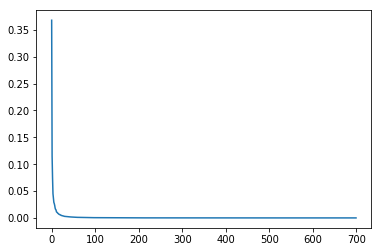

In [42]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [43]:
pca.explained_variance_ratio_[:700].sum()#选取700维后，累计贡献率为0.9998731096400432（相当于可以解释99.99%的源数据）

0.9998731096400432

In [44]:
Aggregate = [diagcovariates,left_LD,right_LD] #合并数据
Data_Analysis = pd.concat(Aggregate,axis = 1)
Data_Analysis

,RID,Gender,Handedness,Widowed,Divorced,Never married,Education,Retirement,Age,status,...,right690,right691,right692,right693,right694,right695,right696,right697,right698,right699
0,295,1,1,0,0,0,18,1,85,1,...,-0.129516,-0.128099,-0.032423,-0.089580,-0.038966,0.058916,-0.049418,0.279011,-0.208242,-0.072570
1,413,2,1,0,0,0,16,0,77,1,...,0.045262,-0.175997,0.090433,-0.045915,0.112392,0.009694,0.113731,0.297949,0.103845,-0.150231
2,559,1,1,1,0,0,16,1,79,1,...,-0.157845,0.247700,0.096685,-0.087032,-0.106803,-0.133719,-0.129164,0.047392,0.036294,-0.150850
3,619,1,1,0,0,0,12,1,78,3,...,0.153139,0.055489,-0.183134,-0.186164,-0.146990,0.040576,0.095785,0.128902,0.047188,-0.013661
4,685,2,1,0,0,0,16,1,90,1,...,-0.122586,0.399972,0.031827,0.049605,0.060257,0.000784,-0.036941,0.022880,-0.097306,-0.116578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1202,1,1,0,0,0,18,0,78,1,...,0.038840,-0.070709,-0.207584,-0.068896,-0.008305,-0.190564,-0.042923,0.132066,-0.057370,-0.181123
794,1203,1,1,0,0,0,15,1,84,1,...,-0.103079,-0.107602,-0.210527,-0.265762,-0.200648,-0.070810,-0.015309,-0.020293,-0.040559,-0.073459
795,1295,1,1,0,0,0,16,1,77,2,...,-0.038104,-0.183286,-0.069560,0.011760,0.012964,-0.066553,0.157087,0.038194,0.019643,0.068648
796,1311,1,1,0,0,0,12,1,69,2,...,-0.027078,-0.240137,-0.069005,-0.034070,-0.217399,-0.069550,-0.013393,0.031940,0.086068,-0.184928


In [45]:
Data_Analysis = Data_Analysis.drop(["RID"],axis = 1)

In [46]:
Data_Analysis

,Gender,Handedness,Widowed,Divorced,Never married,Education,Retirement,Age,status,left0,...,right690,right691,right692,right693,right694,right695,right696,right697,right698,right699
0,1,1,0,0,0,18,1,85,1,-34.854446,...,-0.129516,-0.128099,-0.032423,-0.089580,-0.038966,0.058916,-0.049418,0.279011,-0.208242,-0.072570
1,2,1,0,0,0,16,0,77,1,-105.429863,...,0.045262,-0.175997,0.090433,-0.045915,0.112392,0.009694,0.113731,0.297949,0.103845,-0.150231
2,1,1,1,0,0,16,1,79,1,68.514514,...,-0.157845,0.247700,0.096685,-0.087032,-0.106803,-0.133719,-0.129164,0.047392,0.036294,-0.150850
3,1,1,0,0,0,12,1,78,3,30.467285,...,0.153139,0.055489,-0.183134,-0.186164,-0.146990,0.040576,0.095785,0.128902,0.047188,-0.013661
4,2,1,0,0,0,16,1,90,1,4.899948,...,-0.122586,0.399972,0.031827,0.049605,0.060257,0.000784,-0.036941,0.022880,-0.097306,-0.116578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1,1,0,0,0,18,0,78,1,39.357198,...,0.038840,-0.070709,-0.207584,-0.068896,-0.008305,-0.190564,-0.042923,0.132066,-0.057370,-0.181123
794,1,1,0,0,0,15,1,84,1,-32.181629,...,-0.103079,-0.107602,-0.210527,-0.265762,-0.200648,-0.070810,-0.015309,-0.020293,-0.040559,-0.073459
795,1,1,0,0,0,16,1,77,2,26.786954,...,-0.038104,-0.183286,-0.069560,0.011760,0.012964,-0.066553,0.157087,0.038194,0.019643,0.068648
796,1,1,0,0,0,12,1,69,2,27.706479,...,-0.027078,-0.240137,-0.069005,-0.034070,-0.217399,-0.069550,-0.013393,0.031940,0.086068,-0.184928


设置随机种子为202106，并将数据按照8：2的比例随机分为训练集和测试集

In [47]:
seed(202106)

n, m = Data_Analysis.shape
train_rows = sample(range(n), int(n*0.8))
train_all = Data_Analysis.iloc[train_rows,:]
test_all = Data_Analysis.drop(train_all.index)

分析各个属性对于病人患病状态程度的影响

In [48]:
X_train = train_all.drop(['status'],axis = 1)
y_train = train_all['status']
X_test = test_all.drop(['status'],axis = 1)
y_test = test_all['status']

# Modelling

## SVM

In [49]:
start6=time.clock()
#SVM向量机
svm_clf=SVC(kernel='linear', gamma=1.0,probability=True)
svm_clf.fit(X_train, y_train)
end6=time.clock()
print('Running time: %s Seconds'%(end6-start6))

Running time: 1.0010054000003947 Seconds


In [50]:
#采用5层交叉检验，评价指标选择f1_micro
test_score6 = cross_val_score(svm_clf, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score6.mean())

5层交叉检验平均得分 0.4125


In [51]:
#观察混淆矩阵及其正确率
print('SVM算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,svm_clf)

SVM算法 测试集 混淆矩阵及其正确率：
[[19 18  6]
 [13 44 18]
 [ 6 23 13]]
              precision    recall  f1-score   support

           1       0.50      0.44      0.47        43
           2       0.52      0.59      0.55        75
           3       0.35      0.31      0.33        42

    accuracy                           0.48       160
   macro avg       0.46      0.45      0.45       160
weighted avg       0.47      0.47      0.47       160



## DT：CART gini

In [52]:
start7=time.clock()
cart_clf=tree.DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=3)   #CRAT gini算法
cart_clf.fit(X_train, y_train)
end7=time.clock()
print('Running time: %s Seconds'%(end7-start7))

Running time: 0.2280625000003056 Seconds


In [53]:
#采用5层交叉检验，评价指标选择f1_micro
test_score7 = cross_val_score(cart_clf, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score7.mean())

5层交叉检验平均得分 0.48125


CART gini算法 决策树分类规则及可视化


[Text(422,434.21,'X[708] <= -3.492\ngini = 0.628\nsamples = 638\nvalue = [181, 313, 144]'),
 Text(211,310.15,'X[546] <= 0.28\ngini = 0.586\nsamples = 306\nvalue = [46, 168, 92]'),
 Text(105.5,186.09,'X[200] <= 1.765\ngini = 0.557\nsamples = 269\nvalue = [39, 160, 70]'),
 Text(52.75,62.03,'gini = 0.543\nsamples = 258\nvalue = [39, 159, 60]'),
 Text(158.25,62.03,'gini = 0.165\nsamples = 11\nvalue = [0, 1, 10]'),
 Text(316.5,186.09,'X[273] <= 0.681\ngini = 0.564\nsamples = 37\nvalue = [7, 8, 22]'),
 Text(263.75,62.03,'gini = 0.45\nsamples = 31\nvalue = [6, 3, 22]'),
 Text(369.25,62.03,'gini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(633,310.15,'X[7] <= 69.5\ngini = 0.619\nsamples = 332\nvalue = [135, 145, 52]'),
 Text(527.5,186.09,'X[608] <= 0.089\ngini = 0.442\nsamples = 65\nvalue = [4, 46, 15]'),
 Text(474.75,62.03,'gini = 0.263\nsamples = 47\nvalue = [2, 40, 5]'),
 Text(580.25,62.03,'gini = 0.568\nsamples = 18\nvalue = [2, 6, 10]'),
 Text(738.5,186.09,'X[709] <= 33.539\ngini = 0.

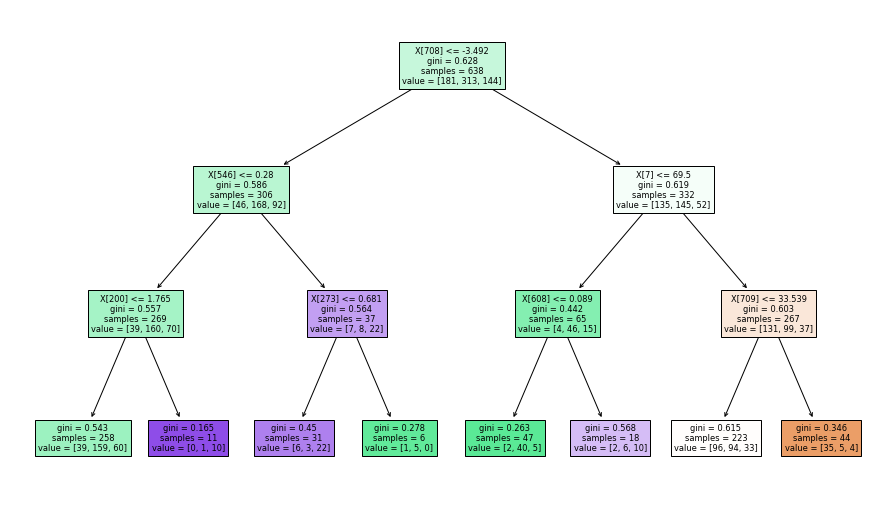

In [54]:
print('CART gini算法 决策树分类规则及可视化')
plt.figure(figsize=(15,9))
plot_tree(cart_clf,filled=True)

In [55]:
print('CART gini 算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,cart_clf)

CART gini 算法 测试集 混淆矩阵及其正确率：
[[30 10  3]
 [22 39 14]
 [ 6 27  9]]
              precision    recall  f1-score   support

           1       0.52      0.70      0.59        43
           2       0.51      0.52      0.52        75
           3       0.35      0.21      0.26        42

    accuracy                           0.49       160
   macro avg       0.46      0.48      0.46       160
weighted avg       0.47      0.49      0.47       160



## DT：C5.0 

In [56]:
start8=time.clock()
c5_clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)#采用 C5.0 熵标准算法
c5_clf.fit(X_train, y_train)
end8=time.clock()
print('Running time: %s Seconds'%(end8-start8))

Running time: 0.46738879999975325 Seconds


In [57]:
#采用5层交叉检验，评价指标选择f1_micro
test_score8 = cross_val_score(c5_clf, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score8.mean())

5层交叉检验平均得分 0.40625


C5.0 熵标准算法 决策树分类规则及可视化


[Text(422,434.21,'X[708] <= -17.208\nentropy = 1.504\nsamples = 638\nvalue = [181, 313, 144]'),
 Text(211,310.15,'X[536] <= -0.351\nentropy = 1.373\nsamples = 239\nvalue = [29, 131, 79]'),
 Text(105.5,186.09,'X[282] <= 0.092\nentropy = 0.993\nsamples = 20\nvalue = [9, 11, 0]'),
 Text(52.75,62.03,'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(158.25,62.03,'entropy = 0.684\nsamples = 11\nvalue = [9, 2, 0]'),
 Text(316.5,186.09,'X[982] <= 1.157\nentropy = 1.322\nsamples = 219\nvalue = [20, 120, 79]'),
 Text(263.75,62.03,'entropy = 1.281\nsamples = 207\nvalue = [17, 120, 70]'),
 Text(369.25,62.03,'entropy = 0.811\nsamples = 12\nvalue = [3, 0, 9]'),
 Text(633,310.15,'X[7] <= 69.5\nentropy = 1.473\nsamples = 399\nvalue = [152, 182, 65]'),
 Text(527.5,186.09,'X[612] <= 0.318\nentropy = 1.066\nsamples = 76\nvalue = [4, 54, 18]'),
 Text(474.75,62.03,'entropy = 0.905\nsamples = 73\nvalue = [1, 54, 18]'),
 Text(580.25,62.03,'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(738.5,18

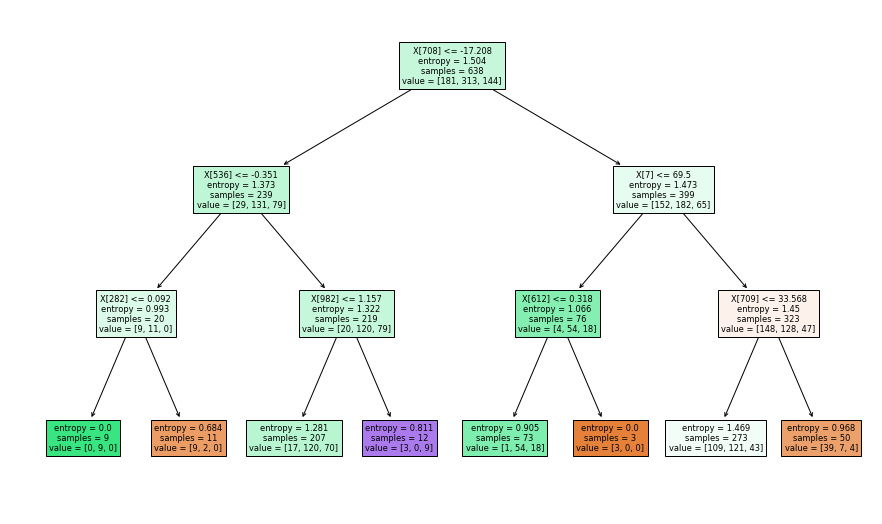

In [58]:
print('C5.0 熵标准算法 决策树分类规则及可视化')
plt.figure(figsize=(15,9))
plot_tree(c5_clf,filled=True)

In [59]:
print('C5.0 熵标准算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,c5_clf)

C5.0 熵标准算法 测试集 混淆矩阵及其正确率：
[[ 6 36  1]
 [ 7 68  0]
 [ 1 40  1]]
              precision    recall  f1-score   support

           1       0.43      0.14      0.21        43
           2       0.47      0.91      0.62        75
           3       0.50      0.02      0.05        42

    accuracy                           0.47       160
   macro avg       0.47      0.36      0.29       160
weighted avg       0.47      0.47      0.36       160



## GBDT

In [60]:
start9=time.clock()
GB_clf = GradientBoostingClassifier(n_estimators=9, random_state=111)  #梯度提升树分类器
GB_clf.fit(X_train, y_train)
end9=time.clock()
print('Running time: %s Seconds'%(end9-start9))

Running time: 4.960936899999979 Seconds


In [61]:
#采用5层交叉检验，评价指标选择f1_micro
test_score9 = cross_val_score(GB_clf, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score9.mean())

5层交叉检验平均得分 0.4


In [62]:
print('梯度提升树算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,GB_clf)

梯度提升树算法 测试集 混淆矩阵及其正确率：
[[ 7 36  0]
 [ 7 67  1]
 [ 0 41  1]]
              precision    recall  f1-score   support

           1       0.50      0.16      0.25        43
           2       0.47      0.89      0.61        75
           3       0.50      0.02      0.05        42

    accuracy                           0.47       160
   macro avg       0.49      0.36      0.30       160
weighted avg       0.48      0.47      0.36       160



## Bagging

In [63]:
start10=time.clock()
Bag_clf = BaggingClassifier(n_estimators=9, random_state=111)   #装袋分类器
Bag_clf.fit(X_train, y_train)
end10=time.clock()
print('Running time: %s Seconds'%(end10-start10))

Running time: 2.638688000000002 Seconds


In [64]:
#采用5层交叉检验，评价指标选择f1_micro
test_score10 = cross_val_score(Bag_clf, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score10.mean())

5层交叉检验平均得分 0.39375


In [65]:
print('Bagging算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,Bag_clf)

Bagging算法 测试集 混淆矩阵及其正确率：
[[24 17  2]
 [14 50 11]
 [ 4 30  8]]
              precision    recall  f1-score   support

           1       0.57      0.56      0.56        43
           2       0.52      0.67      0.58        75
           3       0.38      0.19      0.25        42

    accuracy                           0.51       160
   macro avg       0.49      0.47      0.47       160
weighted avg       0.50      0.51      0.49       160



## Ensemble 

In [66]:
start11=time.clock()
eclf = VotingClassifier(estimators=[('C5', c5_clf), ('CART', cart_clf), ('GB', GB_clf), ('Bag', Bag_clf)], voting='soft')
eclf.fit(X_train,y_train)
end11=time.clock()
print('Running time: %s Seconds'%(end11-start11))

Running time: 8.180075499999475 Seconds


In [67]:
#采用5层交叉检验，评价指标选择f1_micro
test_score11 = cross_val_score(eclf, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score11.mean())

5层交叉检验平均得分 0.44375


In [68]:
print('集成学习算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,eclf)

集成学习算法 测试集 混淆矩阵及其正确率：
[[19 23  1]
 [ 9 62  4]
 [ 1 37  4]]
              precision    recall  f1-score   support

           1       0.66      0.44      0.53        43
           2       0.51      0.83      0.63        75
           3       0.44      0.10      0.16        42

    accuracy                           0.53       160
   macro avg       0.54      0.45      0.44       160
weighted avg       0.53      0.53      0.48       160



## LightGBM

In [69]:
start12=time.clock()
lgb=lgbm.LGBMClassifier(num_leaves=60,learning_rate=0.05,n_estimators=40)
lgb.fit(X_train,y_train)
end12=time.clock()
print('Running time: %s Seconds'%(end12-start12))

Running time: 4.2616219000001365 Seconds


In [70]:
#采用5层交叉检验，评价指标选择f1_micro
test_score12 = cross_val_score(lgb, X_test, y_test, cv = 5, scoring = 'f1_micro')
print('5层交叉检验平均得分',test_score12.mean())

5层交叉检验平均得分 0.46875


In [71]:
print('C5.0 熵标准算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(X_test,y_test,lgb)

C5.0 熵标准算法 测试集 混淆矩阵及其正确率：
[[12 31  0]
 [10 63  2]
 [ 1 39  2]]
              precision    recall  f1-score   support

           1       0.52      0.28      0.36        43
           2       0.47      0.84      0.61        75
           3       0.50      0.05      0.09        42

    accuracy                           0.48       160
   macro avg       0.50      0.39      0.35       160
weighted avg       0.49      0.48      0.40       160



In [83]:
AP1 = {'Support Vector': 0.48, 'CART gini': 0.49, 'C5.0 Entropy': 0.47
          , 'Gradient Boosting':  0.47, 'Bagging':  0.51, 'Ensemble Learning':  0.53, 'LightGBM':  0.48}

In [84]:
df5 = pd.DataFrame([AP1]).T
df5.columns=['Average_Precision']
df5

,Average_Precision
Support Vector,0.48
CART gini,0.49
C5.0 Entropy,0.47
Gradient Boosting,0.47
Bagging,0.51
Ensemble Learning,0.53
LightGBM,0.48


In [85]:
CVS1 = {'Support Vector': 0.413, 'CART gini': 0.481, 'C5.0 Entropy': 0.406
          , 'Gradient Boosting':  0.400, 'Bagging':  0.394, 'Ensemble Learning':  0.444, 'LightGBM':  0.469}

In [86]:
df6 = pd.DataFrame([CVS1]).T
df6.columns=['Cross_Val_Score']
df6

,Cross_Val_Score
Support Vector,0.413
CART gini,0.481
C5.0 Entropy,0.406
Gradient Boosting,0.400
Bagging,0.394
Ensemble Learning,0.444
LightGBM,0.469


In [87]:
ALL1= pd.concat([df5,df6],axis=1,join='inner')
ALL1

,Average_Precision,Cross_Val_Score
Support Vector,0.48,0.413
CART gini,0.49,0.481
C5.0 Entropy,0.47,0.406
Gradient Boosting,0.47,0.400
Bagging,0.51,0.394
Ensemble Learning,0.53,0.444
LightGBM,0.48,0.469


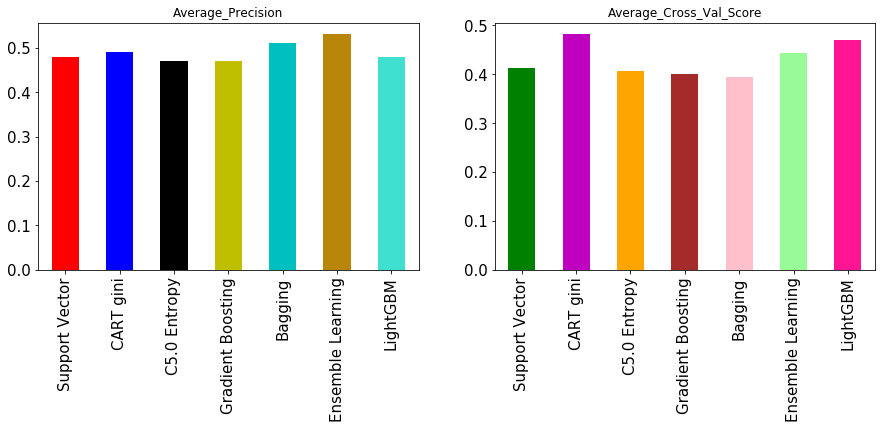

In [92]:
plt.subplot(221)
ALL1.Average_Precision.plot(kind='bar',color=['r','b','k','y','c','darkgoldenrod','turquoise'],figsize=(15,10))
plt.title('Average_Precision')
plt.tick_params(labelsize=15)
plt.subplot(222)
ALL1.Cross_Val_Score.plot(kind='bar',color=['g','m','orange','brown','pink','palegreen','deeppink'],figsize=(15,10))
plt.title('Average_Cross_Val_Score')
plt.tick_params(labelsize=15)
plt.show()